In [1]:
#Here the tsv format of clinical data is being used for data visulaization.

In [2]:
#Loading packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading dataset
bladder = pd.read_csv('../input/tcgametadata/clinical_BLCA.tsv',sep="\t")
breast = pd.read_csv('../input/tcgametadata/clinical_BRCA.tsv',sep="\t")


#rows x cols
print(breast.shape)
print (bladder.shape)

(2194, 154)
(824, 154)


In [3]:
#DATA PRE-PROCESSING - BREAST
breast.info()
breast.isnull().sum()

#No of columns in -BREAST
breast.shape 
#2194 rows and 154 columns

#column name
breast_cols = list(breast)
breast_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194 entries, 0 to 2193
Columns: 154 entries, case_id to treatment_type
dtypes: int64(2), object(152)
memory usage: 2.6+ MB


['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'age_is_obfuscated',
 'cause_of_death',
 'cause_of_death_source',
 'country_of_residence_at_enrollment',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'occupation_duration_years',
 'premature_at_birth',
 'race',
 'vital_status',
 'weeks_gestation_at_birth',
 'year_of_birth',
 'year_of_death',
 'age_at_diagnosis',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'anaplasia_present',
 'anaplasia_present_type',
 'ann_arbor_b_symptoms',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'ann_arbor_pathologic_stage',
 'best_overall_response',
 'breslow_thickness',
 'burkitt_lymphoma_clinical_variant',
 'child_pugh_classification',
 'circumferential_resection_margin',
 'classification_of_tumor',
 'cog_liver_stage',
 'cog_neuroblastoma_ri

In [4]:
#DATA PRE-PROCESSING - BREAST
bladder.info()
bladder.isnull().sum()

#No of columns in -BREAST
bladder.shape
#824 rows and 154 columns

#column name
bladder_cols = list(bladder)
bladder_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Columns: 154 entries, case_id to treatment_type
dtypes: int64(2), object(152)
memory usage: 991.5+ KB


['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'age_is_obfuscated',
 'cause_of_death',
 'cause_of_death_source',
 'country_of_residence_at_enrollment',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'occupation_duration_years',
 'premature_at_birth',
 'race',
 'vital_status',
 'weeks_gestation_at_birth',
 'year_of_birth',
 'year_of_death',
 'age_at_diagnosis',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'anaplasia_present',
 'anaplasia_present_type',
 'ann_arbor_b_symptoms',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'ann_arbor_pathologic_stage',
 'best_overall_response',
 'breslow_thickness',
 'burkitt_lymphoma_clinical_variant',
 'child_pugh_classification',
 'circumferential_resection_margin',
 'classification_of_tumor',
 'cog_liver_stage',
 'cog_neuroblastoma_ri

In [5]:
#To find common columns between two df
common = breast.columns.intersection(bladder.columns)
common 

#ALL 154 COLUMNS ARE SAME BETWEEN BOTH BREAST AND BLADDER DATASET

Index(['case_id', 'case_submitter_id', 'project_id', 'age_at_index',
       'age_is_obfuscated', 'cause_of_death', 'cause_of_death_source',
       'country_of_residence_at_enrollment', 'days_to_birth', 'days_to_death',
       ...
       'treatment_arm', 'treatment_dose', 'treatment_dose_units',
       'treatment_effect', 'treatment_effect_indicator', 'treatment_frequency',
       'treatment_intent_type', 'treatment_or_therapy', 'treatment_outcome',
       'treatment_type'],
      dtype='object', length=154)

In [6]:
#DATA PRE-PROCESSING
def noise_reduction(df):
    df = df.drop(columns=df.columns[(df == '\'--').any()])
    return df

#breast data cleaning
breast_df = noise_reduction(breast) 
breast_df

,case_id,case_submitter_id,project_id,age_at_index,ethnicity,gender,race,vital_status,ajcc_pathologic_m,ajcc_pathologic_n,...,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,treatment_or_therapy,treatment_type
0,8cf8b620-7ab6-4b6e-84bc-ff5a83f381fa,TCGA-A8-A07G,TCGA-BRCA,65,not reported,female,not reported,Alive,M0,N1a,...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,yes,"Pharmaceutical Therapy, NOS"
1,8cf8b620-7ab6-4b6e-84bc-ff5a83f381fa,TCGA-A8-A07G,TCGA-BRCA,65,not reported,female,not reported,Alive,M0,N1a,...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,yes,"Radiation Therapy, NOS"
2,deba32e4-0e68-4711-941b-3b63bd965afb,TCGA-A2-A3XY,TCGA-BRCA,49,not hispanic or latino,female,black or african american,Dead,M0,N1a,...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,yes,"Radiation Therapy, NOS"
3,deba32e4-0e68-4711-941b-3b63bd965afb,TCGA-A2-A3XY,TCGA-BRCA,49,not hispanic or latino,female,black or african american,Dead,M0,N1a,...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,yes,"Pharmaceutical Therapy, NOS"
4,a8015490-9740-45c9-8bd2-eb6d1beefc2e,TCGA-E2-A152,TCGA-BRCA,56,not hispanic or latino,female,white,Alive,M0,N0,...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,yes,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,01263518-5f7c-49dc-8d7e-84b0c03a6a63,TCGA-A8-A07W,TCGA-BRCA,76,not reported,female,not reported,Alive,M1,NX,...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,no,"Radiation Therapy, NOS"
2190,eb2dbb4f-66b6-4525-8323-431970f7a64e,TCGA-A2-A0CM,TCGA-BRCA,40,not hispanic or latino,female,black or african american,Dead,M0,N0 (i-),...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,yes,"Pharmaceutical Therapy, NOS"
2191,eb2dbb4f-66b6-4525-8323-431970f7a64e,TCGA-A2-A0CM,TCGA-BRCA,40,not hispanic or latino,female,black or african american,Dead,M0,N0 (i-),...,"Infiltrating duct carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,no,"Radiation Therapy, NOS"
2192,86cf879e-3b40-44dd-aaa7-6f49f54a15d9,TCGA-AC-A3YJ,TCGA-BRCA,66,not hispanic or latino,female,white,Alive,MX,N0 (i-),...,"Papillary carcinoma, NOS",no,No,not reported,"Breast, NOS",No,"Breast, NOS",not reported,yes,"Pharmaceutical Therapy, NOS"


In [7]:
#bladder data cleaning
bladder_df = noise_reduction(bladder)
bladder_df.columns
bladder_df

,case_id,case_submitter_id,project_id,age_at_index,ethnicity,gender,race,vital_status,classification_of_tumor,days_to_diagnosis,...,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,treatment_or_therapy,treatment_type
0,3b464065-b2e9-4fb2-a7da-09e963fd43b3,TCGA-2F-A9KW,TCGA-BLCA,67,not hispanic or latino,female,white,Dead,not reported,0,...,Transitional cell carcinoma,no,No,not reported,"Bladder, NOS",No,"Bladder, NOS",not reported,no,"Pharmaceutical Therapy, NOS"
1,3b464065-b2e9-4fb2-a7da-09e963fd43b3,TCGA-2F-A9KW,TCGA-BLCA,67,not hispanic or latino,female,white,Dead,not reported,0,...,Transitional cell carcinoma,no,No,not reported,"Bladder, NOS",No,"Bladder, NOS",not reported,yes,"Radiation Therapy, NOS"
2,9743e684-25dd-4dd9-9b84-6ae9518d1818,TCGA-5N-A9KM,TCGA-BLCA,73,not hispanic or latino,female,white,Dead,not reported,0,...,Transitional cell carcinoma,no,No,not reported,"Bladder, NOS",No,"Bladder, NOS",not reported,no,"Radiation Therapy, NOS"
3,9743e684-25dd-4dd9-9b84-6ae9518d1818,TCGA-5N-A9KM,TCGA-BLCA,73,not hispanic or latino,female,white,Dead,not reported,0,...,Transitional cell carcinoma,no,No,not reported,"Bladder, NOS",No,"Bladder, NOS",not reported,no,"Pharmaceutical Therapy, NOS"
4,cc8602bb-78e2-4732-9784-83c3388b999e,TCGA-KQ-A41S,TCGA-BLCA,87,not reported,female,white,Alive,not reported,0,...,Transitional cell carcinoma,no,No,not reported,Posterior wall of bladder,No,Posterior wall of bladder,not reported,no,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,97d6568c-0a89-4327-8988-71e81ee8dae6,TCGA-YC-A8S6,TCGA-BLCA,71,not hispanic or latino,male,white,Alive,not reported,0,...,Papillary transitional cell carcinoma,yes,No,not reported,"Bladder, NOS",Not Reported,"Bladder, NOS",not reported,no,"Pharmaceutical Therapy, NOS"
820,9cc92795-7a24-4875-87f0-3efccbfcc970,TCGA-GV-A3JZ,TCGA-BLCA,55,not hispanic or latino,male,white,Alive,not reported,0,...,Transitional cell carcinoma,yes,No,not reported,"Bladder, NOS",Not Reported,"Bladder, NOS",not reported,yes,"Pharmaceutical Therapy, NOS"
821,9cc92795-7a24-4875-87f0-3efccbfcc970,TCGA-GV-A3JZ,TCGA-BLCA,55,not hispanic or latino,male,white,Alive,not reported,0,...,Transitional cell carcinoma,yes,No,not reported,"Bladder, NOS",Not Reported,"Bladder, NOS",not reported,no,"Radiation Therapy, NOS"
822,419deaac-ea45-4bdd-9fa0-b5cd8429b44f,TCGA-BT-A20Q,TCGA-BLCA,73,not hispanic or latino,male,white,Dead,not reported,0,...,Transitional cell carcinoma,no,No,not reported,Trigone of bladder,No,Trigone of bladder,not reported,no,"Radiation Therapy, NOS"


In [8]:
#Missing 3 cols 

bld_cols = bladder_df.columns
brst_cols = breast_df.columns

diff  = brst_cols.difference(bld_cols)
print(diff)

Index(['ajcc_pathologic_m', 'ajcc_pathologic_n', 'ajcc_pathologic_t'], dtype='object')


In [9]:
#SUMMARY TABLE FOR CATEGORICAL VARIABLES
def summary_table(df):
    df2 = df[['race','gender','ethnicity','vital_status','classification_of_tumor','primary_diagnosis',
                  'treatment_type','treatment_or_therapy','tissue_or_organ_of_origin']]


    summary = pd.concat([pd.crosstab(df2[x], df2.gender) for x in df2.columns[:-1]], keys=df2.columns[:-1])
    return summary

In [10]:
#BLADDER SUMMARY
summary_table(bladder_df)

gender                                                         female  male
race                    asian                                      16    72
                        black or african american                  20    26
                        not reported                               14    22
                        white                                     166   488
gender                  female                                    216     0
                        male                                        0   608
ethnicity               hispanic or latino                          6    12
                        not hispanic or latino                    200   542
                        not reported                               10    54
vital_status            Alive                                     112   346
                        Dead                                      104   260
                        Not Reported                                0     2
classification_of_tumor not reported                              216   608
primary_diagnosis       Carcinoma, NOS                              0     2
                        Papillary adenocarcinoma, NOS               2     0
                        Papillary transitional cell carcinoma      26   106
                        Squamous cell carcinoma, NOS                2     0
                        Transitional cell carcinoma               186   500
treatment_type          Pharmaceutical Therapy, NOS               108   304
                        Radiation Therapy, NOS                    108   304
treatment_or_therapy    no                                        137   430
                        not reported                               17    42
                        yes                                        62   136

In [11]:
#BREAST SUMMARY
summary_table(breast_df)

gender                                                                      female  \
race                    american indian or alaska native                         2   
                        asian                                                  122   
                        black or african american                              360   
                        not reported                                           188   
                        white                                                 1498   
gender                  female                                                2170   
                        male                                                     0   
ethnicity               hispanic or latino                                      74   
                        not hispanic or latino                                1754   
                        not reported                                           342   
vital_status            Alive                                                 1868   
                        Dead                                                   302   
classification_of_tumor not reported                                          2170   
primary_diagnosis       Adenoid cystic carcinoma                                 2   
                        Apocrine adenocarcinoma                                  2   
                        Basal cell carcinoma, NOS                                2   
                        Carcinoma, NOS                                           2   
                        Cribriform carcinoma, NOS                                2   
                        Infiltrating duct and lobular carcinoma                 56   
                        Infiltrating duct carcinoma, NOS                      1534   
                        Infiltrating duct mixed with other types of car...      38   
                        Infiltrating lobular mixed with other types of ...      14   
                        Intraductal micropapillary carcinoma                     6   
                        Intraductal papillary adenocarcinoma with invasion      12   
                        Large cell neuroendocrine carcinoma                      2   
                        Lobular carcinoma, NOS                                 402   
                        Medullary carcinoma, NOS                                12   
                        Metaplastic carcinoma, NOS                              28   
                        Mucinous adenocarcinoma                                 32   
                        Paget disease and infiltrating duct carcinoma o...       6   
                        Papillary carcinoma, NOS                                 4   
                        Phyllodes tumor, malignant                               4   
                        Pleomorphic carcinoma                                    6   
                        Secretory carcinoma of breast                            2   
                        Tubular adenocarcinoma                                   2   
treatment_type          Pharmaceutical Therapy, NOS                           1085   
                        Radiation Therapy, NOS                                1085   
treatment_or_therapy    no                                                     575   
                        not reported                                           196   
                        yes                                                   1399   

gender                                                                      male  
race                    american indian or alaska native                       0  
                        asian                                                  0  
                        black or african american                              6  
                        not reported                                           2  
                        white                             

In [12]:
#DATA VISUALIZATION 
def data_visuals(df):
    
    #AGE
    df['age_at_index'].value_counts()
    #Age distribution 
    plt.rcParams['figure.figsize'] = (25, 8)
    f = sns.countplot(x=df['age_at_index'],palette = 'hsv')
    f.bar_label(f.containers[0])
    plt.title('Age distribution of cases')
    plt.show()
    
    #Vital status
    df['vital_status'].value_counts()
    sns.catplot(x="vital_status", y="age_at_index", hue="gender",kind="violin", split=True, data=df)
    plt.ylabel('AGE')
    plt.xlabel('VITAL STATUS')
    plt.title('Age vs Survival')
    plt.show()

    #Primary diagnosis
    df['primary_diagnosis'].value_counts()
    f, ax = plt.subplots(figsize=(7, 7))
    sns.countplot(y="primary_diagnosis", data=df, color="c")
    
    #Race 
    sns.catplot(x="race", y="age_at_index",data=df, orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
    plt.ylabel('AGE')
    plt.xlabel('RACE')
    plt.title('Age vs Race distribution')
    plt.show()
    
    #ethinicity
    labels = ['Not hispanic/Latino', 'Not reported','Hispanic/Latino']
    size = df['ethnicity'].value_counts()
    colors = ['pink', 'cyan','green']
    explode = (0.15, 0, 0)
    plt.rcParams['figure.figsize'] = (7, 7)
    plt.pie(size, colors = colors,labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
    plt.title('Ethinicity', fontsize = 25)
    plt.axis('off')
    plt.legend()
    plt.show()
    
    #treatment/therapy
    df['treatment_or_therapy'].value_counts()
    #treatment/therapy
    labels = ['No', 'Yes','Not reported']
    size = df['treatment_or_therapy'].value_counts()
    explode =(0.1,0,0)
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    plt.rcParams['figure.figsize'] = (6, 6)
    plt.pie(size, colors = colors,labels = labels, explode =  explode,shadow = True, autopct = '%.2f%%')
    plt.title('Treatment/ Therapy', fontsize = 25)
    plt.axis('off')
    plt.legend()
    plt.show()
    
    
    #treatment_type
    bladder_df['treatment_type'].value_counts()


    #treatment_type
    labels = ['Pharmaceutical Therapy', 'Radiation Therapy']
    size = df['treatment_type'].value_counts()
    explode =(0.05,0)
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    plt.rcParams['figure.figsize'] = (6, 6)
    plt.pie(size, colors = colors,labels = labels, explode =  explode,shadow = True, autopct = '%.2f%%')
    plt.title('Treatment Type', fontsize = 25)
    plt.axis('off')
    plt.legend()
    plt.show()

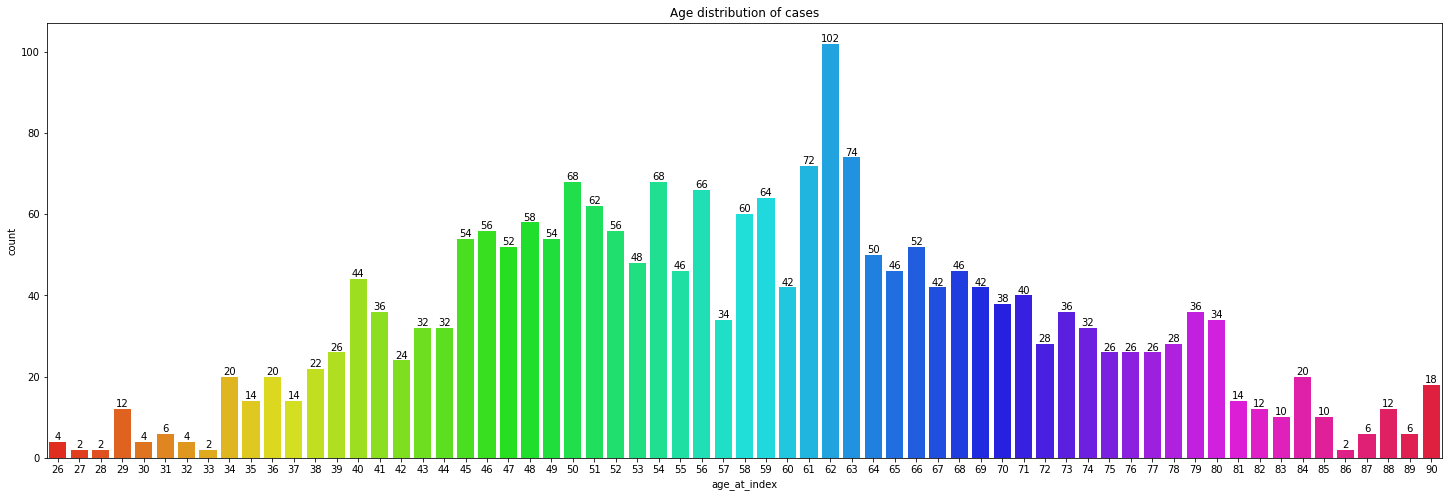

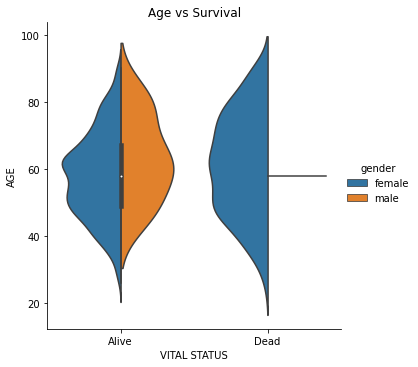

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


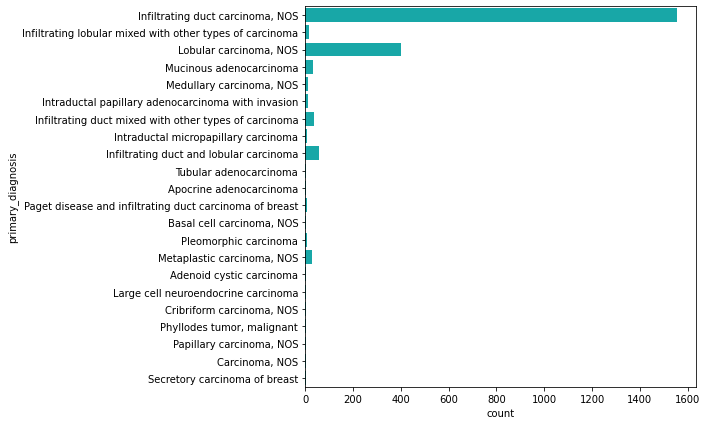

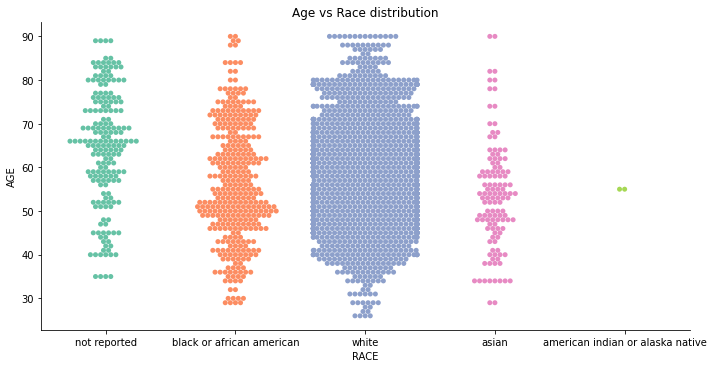

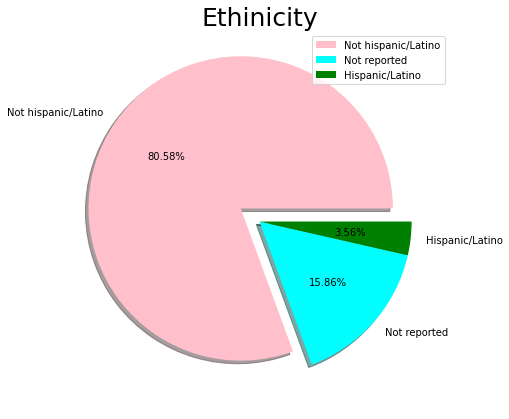

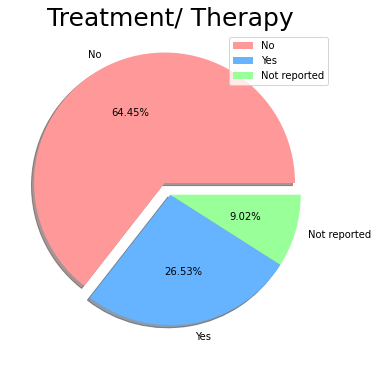

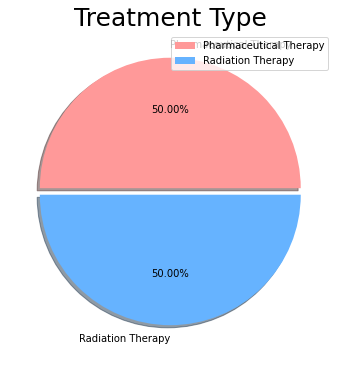

In [13]:
#Please scroll till end see the vizuals.
#DATA VISUALIZATION BREAST CANCER
data_visuals(breast_df)

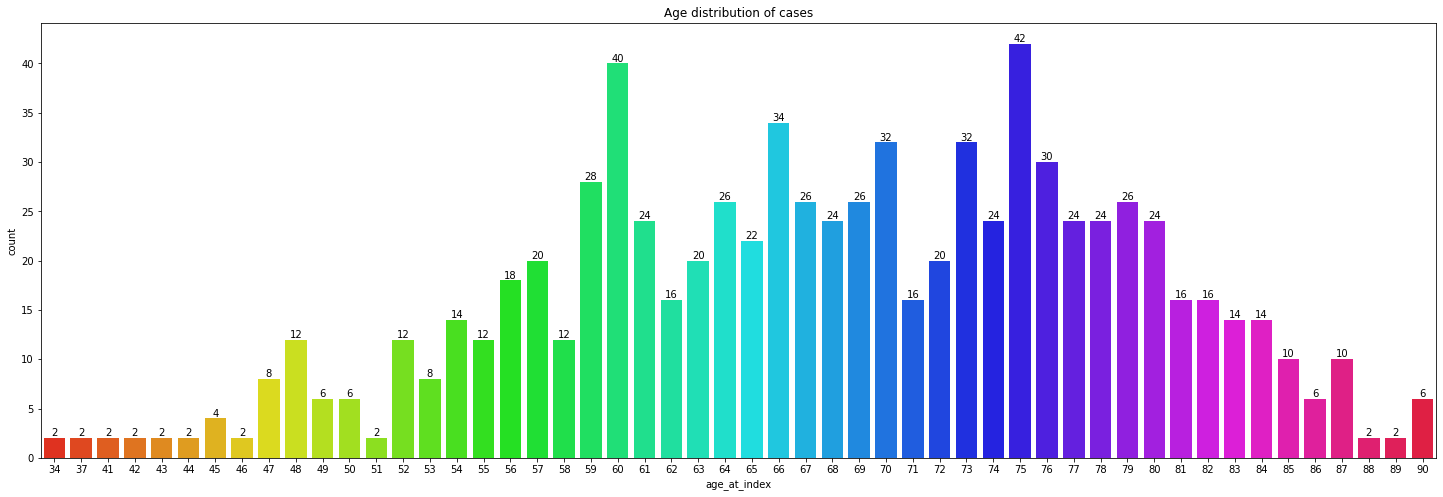

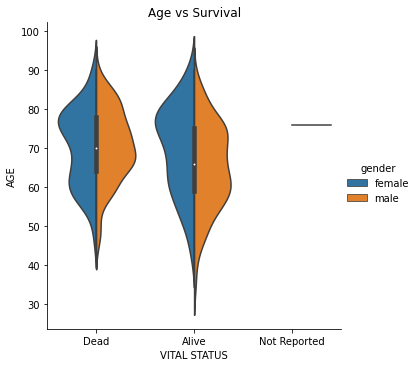

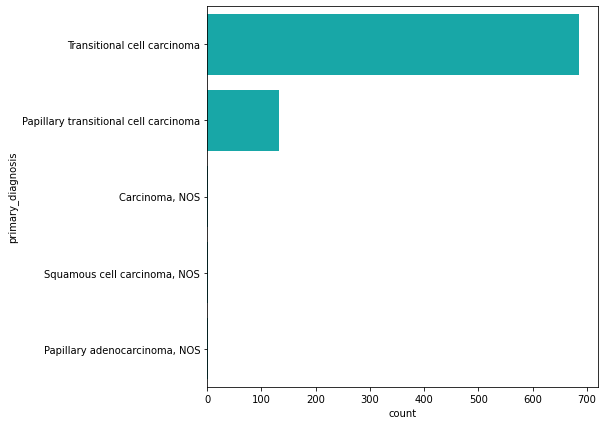

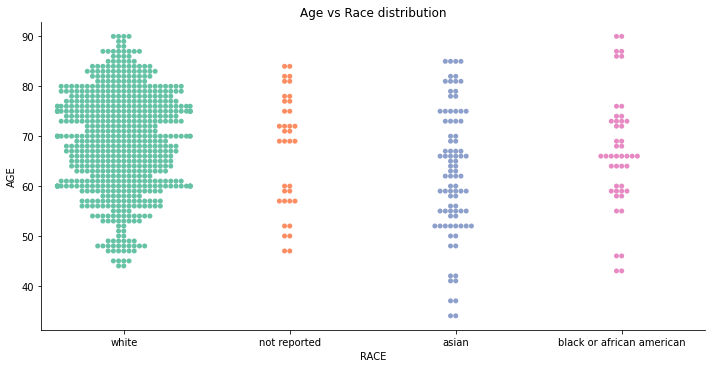

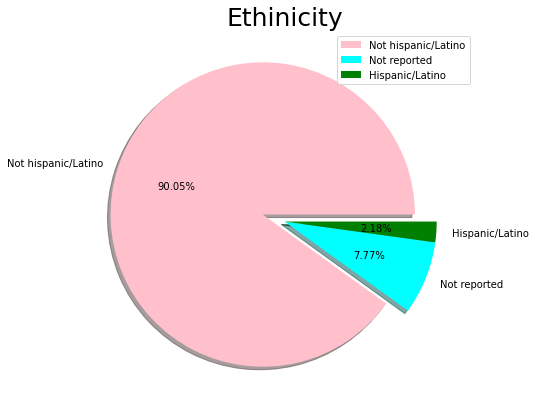

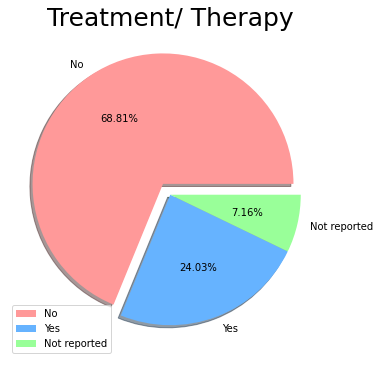

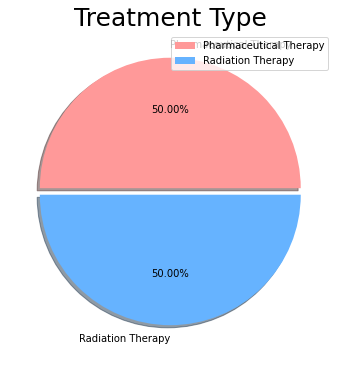

In [14]:
#Please scroll till end see the vizuals.
#DATA VISUALIZATION BLADDER CANCER
data_visuals(bladder_df)